<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Clasificación del género musical y análisis de sentimientos a partir de la letra de canciones.

## Especialización en Analítica estrategica deDatos
### Procesamiento de Lenguaje Natural

###    Jorge Eduardo Gomez Forero
###    Camilo Andres Rojas Reyes

# Objetivos

### Desarrollar un modelo de clasificación que permita identificar el género al cual pertenece una canción a partir de la letra.

### Identificar a partir del análisis de sentimientos de las letras en idioma ingles, los matices positivos y/o negativos.

# Fuente de información: https://www.letras.com

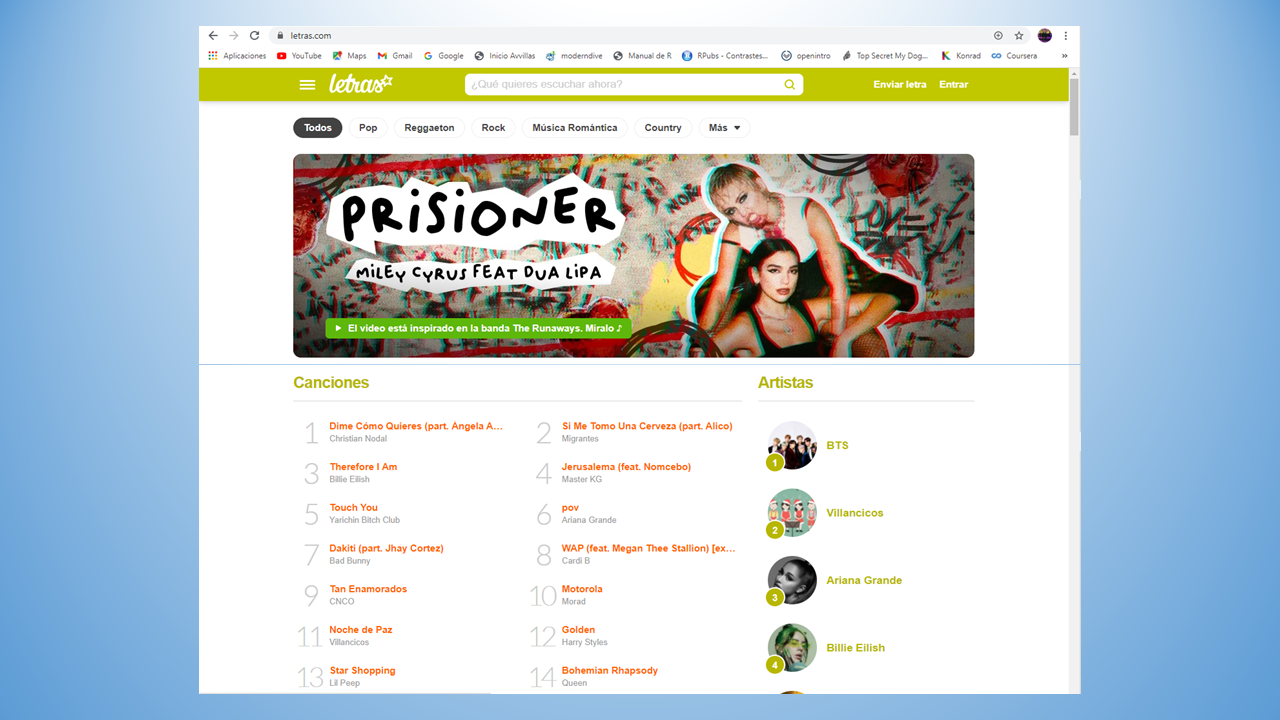

In [1]:
import PIL.Image
from IPython.display import display

ruta = "C:/03_Jorge/01_Especialización_Analitica/02_Semestre/04 Electiva Fundamentos NLP/Proyecto/"
tendencia2 = PIL.Image.open(ruta + "pag_letra.png")
display(tendencia2)

## Parte 1: Web Scraping

### Esta parte del código permite obtener la información, para lo cual se creo rango aleatorio de tiempo en las ejecuciones de extración de información para evitar que sea detectado el web scraping.

### 1.1 Cargue Librerias de trabajo

In [2]:
import pandas as pd
import time                                  #para el funcionamiento del tiempo de ejecución de web scraping
import random                                #para el funcionamiento aleatorio del tiempo
#Se debe cargar las Librerias Request y BeautifulSoup para reaizar web scraping
import urllib.request as ur
import requests                              #Permite enviar y extraer la solicitud de la información Web
import bs4 as bs                             #Permite dar formato y organizar código HTML
import re
import time                                  #para el funcionamiento del tiempo de ejecución de web scraping
import random                                #para el funcionamiento aleatorio del tiempo

In [3]:
#intervalo aleatorio de tiempo
second_start = 0.1
second_end = 2.3
second = round(random.uniform(second_start, second_end),1)

### 1.2 Fuente de información

In [4]:
link1 = "https://www.letras.com/mais-acessadas/"                          #Pagina letras
link2 = "https://www.letras.com"                                          #pagina principal
link4 = "https://www.letras.com/estilos/"                                 #generos musicales

### 1.3 Construcción del dataframe para almacenamiento de la información

In [5]:
import pandas as pd
#Se crea dataframe vacío para anexar la información que se va descargar
data = pd.DataFrame({'fec_descarga': [],'posicion': [], 'link_raiz': [], 'link_exten':[], 'cancion':[], 'letra':[], 'genero':[]})
print(data)

Empty DataFrame
Columns: [fec_descarga, posicion, link_raiz, link_exten, cancion, letra, genero]
Index: []


### 1.4 Extracción lista de géneros musicales de la pagina

In [6]:
link4 = "https://www.letras.com/estilos/"                                 #generos musicales

request_04 = ur.urlopen(link4)
fuente_04 = request_04.read()
request_04.close()
soup_04 = bs.BeautifulSoup(fuente_04,'html.parser')
contenido_04 = soup_04.find('div', class_="g-1 g-fix")

lista_genero =[]   
for genero in contenido_04.find_all("li"):                                #Este bucle imprime los link's de cada canción
    texto_genero = genero.text   
    lista_genero.append(texto_genero)
    lista_genero2 = " ".join(lista_genero)
    lista_genero2 = lista_genero2.split()

lista_genero = lista_genero2 

print(lista_genero)     

['Alternativo', 'Axé', 'Blues', 'Bolero', 'Bossa', 'Nova', 'Brega', 'Country', 'Cuarteto', 'Cumbia', 'Dance', 'Disco', 'Electrónica', 'Emo', 'Fado', 'Folk', 'Forró', 'Funk', 'Funk', 'Brasileño', 'Grunge', 'Guarania', 'Gótico', 'Hard', 'rock', 'Hardcore', 'Heavy', 'Metal', 'Hip', 'Hop/Rap', 'House', 'Indie', 'Industrial', 'J-Pop/J-Rock', 'Jazz', 'Jovem', 'Guarda', 'K-Pop/K-Rock', 'MPB', 'Mambo', 'Marchas/Himnos', 'Mariachi', 'Merengue', 'Música', 'Clásica', 'Música', 'Infantil', 'Música', 'Instrumental', 'Música', 'Psicodélica', 'Música', 'Religiosa', 'Música', 'Romántica', 'Música', 'andina', 'New', 'Age', 'New', 'Wave', 'Pagode', 'Pop', 'Pop', 'Rock', 'Post-Rock', 'Power-Pop', 'Punk', 'Rock', 'R&B', 'Ranchera', 'Reggae', 'Reggaeton', 'Regional', 'Rock', 'Rock', 'Progresivo', 'Rock', 'and', 'Roll', 'Rockabilly', 'Salsa', 'Samba', 'Samba-enredo', 'Sertanejo', 'Ska', 'Soft', 'Rock', 'Soul', 'Surf', 'Music', 'Tango', 'Tecnopop', 'Trova', 'Vieja', 'Guardia', 'World', 'Music', 'Zamba', 'Zou

### 1.5 Extraer información de las canciones

#### La información que se descargara es la fecha en la que se ejecuta el proceso, posición de la canción en el ranking, nombre de la canción, la letra de la canción, género y los link's.

In [7]:
%%time
request_01 = ur.urlopen(link1)
fuente_01 = request_01.read()
request_01.close()
soup_01 = bs.BeautifulSoup(fuente_01,'html.parser')
contenido_01 = soup_01.find('ol', class_="top-list_mus cnt-list--col1-3") #listado de las canciones
link_s = []

posicion_01 = 0                                                           #Inicia posición de la canción en el Top
for link in contenido_01.find_all("a"):                                   #Este bucle imprime los link's de cada canción
    fec_descarga = time.ctime()
    second_start = 0.1
    second_end = 2.3
    second = round(random.uniform(second_start, second_end),1)            #tiempo aleatorio pra que no descubran el robot
    link_s.append(link.get("href"))
    posicion_01 = posicion_01 + 1

    request_02 = ur.urlopen(link2+link.get("href"))
    fuente_02 = request_02.read()
    request_02.close()
    soup_02 = bs.BeautifulSoup(fuente_02,'html.parser')
    contenido_02 = soup_02.find('div', class_="cnt-letra")                #letra
    contenido_03 = soup_02.find('div', class_="breadcrumb cor_1 g-1")     #genero
    
    New_letra = []
    for letra in contenido_02.find_all("p"):                               #Este bucle imprime las letras de cada canción
        new_letra = str(letra).replace("<br>"," ")
        new_letra = str(new_letra).replace("</br>"," ")
        new_letra = str(new_letra).replace("<br/>"," ")
        new_letra = str(new_letra).replace("<p>","")
        new_letra = str(new_letra).replace("</p>","") 
        New_letra.append(new_letra)
        New_letra2 = " ".join(New_letra)
   
    New_genero =[] 
    for genero in contenido_03.find_all("a"):                              #Este bucle imprime el genero de cada canción
        second_start = 0.1
        second_end = 2.3
        second = round(random.uniform(second_start, second_end),1) #tiempo aleatorio pra que no descubran el rob
        new_genero = genero.text   
        New_genero.append(new_genero)
        New_genero2 = " ".join(New_genero)
        New_genero2 = [palabra for palabra in New_genero2.split() if palabra in lista_genero]
        New_genero2 = " ".join(New_genero2)

    data=data.append({'fec_descarga': fec_descarga,
                      'posicion' : posicion_01,
                      'link_raiz' : link2,
                      'link_exten' : link2+link.get("href"),
                      'cancion' : link.get("title"),
                      'letra': New_letra2,
                      'genero': New_genero2},
                       ignore_index=True) 
        
data.head()    

Wall time: 7min 59s


fec_descarga  posicion               link_raiz  \
0  Fri Nov 27 17:00:19 2020       1.0  https://www.letras.com   
1  Fri Nov 27 17:00:19 2020       2.0  https://www.letras.com   
2  Fri Nov 27 17:00:20 2020       3.0  https://www.letras.com   
3  Fri Nov 27 17:00:20 2020       4.0  https://www.letras.com   
4  Fri Nov 27 17:00:21 2020       5.0  https://www.letras.com   

                                          link_exten  \
0  https://www.letras.com/carlos-rivera/100-anos-...   
1  https://www.letras.com/migrantes/si-me-tomo-un...   
2        https://www.letras.com/anuel/me-contagie-2/   
3  https://www.letras.com/christian-nodal/dime-co...   
4  https://www.letras.com/bangtan-boys/life-goes-on/   

                                    cancion  \
0                   100 Años (part. Maluma)   
1      Si Me Tomo Una Cerveza (part. Alico)   
2                             Me Contagié 2   
3  Dime Cómo Quieres (part. Ángela Aguilar)   
4                              Life Goes On   

                                               letra        genero  
0  Mírame a los ojos Que te siento diferente Teng...           Pop  
1  Hace tiempo que lo nuestro terminó Debía decír...        Cumbia  
2  Sin ti, yo no me siento bien Na' más de mil en...     Reggaeton  
3  Todo empezó cuando te vi pasar Sentí algo tan ...      Regional  
4  eoneu nal sesangi meomchwosseo amureon yegodo ...  K-Pop/K-Rock

#### Aunque no existen datos nulos si existen campos con '', por esta razón se crea la marca "No diponible" para conocer el volumen y tomar decisiones acerca de la población sin información.

In [8]:
data.isnull().values.any()

False

In [9]:
def rell_vacios1(row):
    genero_txt = row['genero']
    if genero_txt=='':
        texto1 = 'No diponible'
    else:
        texto1 = genero_txt
    return(texto1)
data[['genero']] = data.apply(rell_vacios1, axis=1, result_type='expand')

In [10]:
def rell_vacios2(row):
    pre_txt = row['letra']
    if pre_txt=='':
        texto2 = 'No diponible'
    else:
        texto2 = pre_txt      
    return(texto2)
data[['letra']] = data.apply(rell_vacios2, axis=1, result_type='expand')

### 1.6 Se exporta copia de seguridad de la información extraida, para evitar perdidas suntanciales, que generen retrasos en el proyecto.

In [11]:
data.to_csv('C:/03_Jorge/01_Especialización_Analitica/02_Semestre/04 Electiva Fundamentos NLP/Proyecto/base_20201127.csv',
                           sep=',',encoding='utf-8')

In [ ]:
#Esta parte se debe ejecutar en caso de inconsistencias que se presenten más adelante y para evitar hacer web scraping nuevamente
data = pd.read_csv(ruta  + 'base_20201127.csv')

## Parte 2: Feature Engineering

### 2.1 Las letras de las canciones pueden estar compuestas por más de un idioma, por esta razón se clasificara la letra de la canción con el idioma predominante.

In [12]:
#Esta libreria permite conocer el tipo porcentaje de el o los idiomas en los que se encuentra la información:
from langdetect import detect, detect_langs

#### Creación de funciones para seleccionar el idioma predominante y su respectiva probabilidad por letra de la canción

In [13]:
#Se crea función para buscar elementos en un dataframe
def buscarElemento(lista, elemento):
    for i in range(0,len(lista)):
        if(lista[i] == elemento):
            return i

In [14]:
#Se crea función para detectar el idioma de mayor predominancia en la letra de la canción
import pandas as pd
import numpy as np

def clasifi_idioma (texto):
    if texto =='':
        idioma_predom = "vacío"
        prob_max = 0
    else:    
        df_idioma = pd.DataFrame({'idioma': [],'probabilidad': []})
        nro_idioma = len(detect_langs(texto))
        list_idioma = detect_langs(texto)
        for idioma in list_idioma:
            idioma1 = idioma
            prob2 = idioma1.prob
            idioma2 = idioma1.lang
            df_idioma = df_idioma.append({'idioma': idioma2,
                                       'probabilidad' : prob2},
                                       ignore_index=True)
            arr = df_idioma['probabilidad'].values
            arr_max = arr.max(); posici_max = np.where(arr == arr_max)
            prob_max = buscarElemento(arr,arr_max)
            idioma_predom = df_idioma.iloc[prob_max, 0]
            prob_max = round(df_idioma.iloc[prob_max, 1],4)
    return(idioma_predom,prob_max)  

In [15]:
def idioma_prob(row):
    text = row['letra']
    idioma = clasifi_idioma(text)[0]
    prob_idioma = clasifi_idioma(text)[1]
    return(idioma,prob_idioma)

#### Se anexa en el dataframe la información del idioma y la probabilidad

In [16]:
%%time
data[['idioma', 'prob_idioma']] = data.apply(idioma_prob, axis=1, result_type='expand')
idiomas_letras =data.groupby('idioma').count()
print(f"En la extracción se identifican {idiomas_letras.count().max()} tipos de idiomas en las letras de las canciones.")
data.head()

En la extracción se identifican 14 tipos de idiomas en las letras de las canciones.
Wall time: 39.8 s


fec_descarga  posicion               link_raiz  \
0  Fri Nov 27 17:00:19 2020       1.0  https://www.letras.com   
1  Fri Nov 27 17:00:19 2020       2.0  https://www.letras.com   
2  Fri Nov 27 17:00:20 2020       3.0  https://www.letras.com   
3  Fri Nov 27 17:00:20 2020       4.0  https://www.letras.com   
4  Fri Nov 27 17:00:21 2020       5.0  https://www.letras.com   

                                          link_exten  \
0  https://www.letras.com/carlos-rivera/100-anos-...   
1  https://www.letras.com/migrantes/si-me-tomo-un...   
2        https://www.letras.com/anuel/me-contagie-2/   
3  https://www.letras.com/christian-nodal/dime-co...   
4  https://www.letras.com/bangtan-boys/life-goes-on/   

                                    cancion  \
0                   100 Años (part. Maluma)   
1      Si Me Tomo Una Cerveza (part. Alico)   
2                             Me Contagié 2   
3  Dime Cómo Quieres (part. Ángela Aguilar)   
4                              Life Goes On   

                                               letra        genero idioma  \
0  Mírame a los ojos Que te siento diferente Teng...           Pop     es   
1  Hace tiempo que lo nuestro terminó Debía decír...        Cumbia     es   
2  Sin ti, yo no me siento bien Na' más de mil en...     Reggaeton     es   
3  Todo empezó cuando te vi pasar Sentí algo tan ...      Regional     es   
4  eoneu nal sesangi meomchwosseo amureon yegodo ...  K-Pop/K-Rock     id   

   prob_idioma  
0       1.0000  
1       1.0000  
2       1.0000  
3       1.0000  
4       0.5714

#### Cantidad de canciones por idioma

In [17]:
#Se determinan los idiomás de las canciones que previamente se habian revisado en el punto 2.1 de este proceso
dg = data.groupby(['idioma']).count()
g_idioma = pd.DataFrame(dg.iloc[:,6])
print(g_idioma)

        genero
idioma        
af           2
ca           2
cy           1
en         385
es         515
fr          13
hr           2
id          21
it           4
pl           2
pt           8
so           1
sw          42
tl           1


#### ISO 639 es una nomenclatura estandarizada que se utiliza para clasificar idiomas . A cada idioma se le asigna una abreviatura en minúscula de dos letras

In [18]:
# Cargar datos
descrip_idioma = pd.read_csv(ruta  + 'ISO_Language_Code_ Table.csv')
print(f"El conjunto de datos ISO Language Code contiene {len(descrip_idioma)} registros")
descrip_idioma.head()

El conjunto de datos ISO Language Code contiene 239 registros


Code                      Name               Name_minusc
0     af                 Afrikaans                 afrikaans
1  af-ZA  Afrikaans (South Africa)  afrikaans (south africa)
2     ar                    Arabic                    arabic
3  ar-AE           Arabic (U.A.E.)           arabic (u.a.e.)
4  ar-BH          Arabic (Bahrain)          arabic (bahrain)

In [19]:
pd.merge(g_idioma, descrip_idioma, left_on='idioma', right_on='Code')

genero Code        Name Name_minusc
0        2   af   Afrikaans   afrikaans
1        2   ca     Catalan     catalan
2        1   cy       Welsh       welsh
3      385   en     English     english
4      515   es     Spanish     spanish
5       13   fr      French      french
6        2   hr    Croatian    croatian
7       21   id  Indonesian  indonesian
8        4   it     Italian     italian
9        2   pl      Polish      polish
10       8   pt  Portuguese  portuguese
11      42   sw     Swahili     swahili
12       1   tl     Tagalog     tagalog

### 2.2 Para la ingenieria de datos, tomaremos la columna letra y pre procesaremos el texto, estandarizando a minúscula, excluyendo caracteres especiales, números y palabras vacías.

In [20]:
#Se importa esta libreria dado que contiene las expresiones regulares.
import re
#Esta libreria se importa una sola vez, sin embargo se deja como tema ilustrativo para recordar de donde proviene 'stopwords':
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jgome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [22]:
%%time

data['pre_procesado'] = data['letra'].values

stopwords_ar = stopwords.words('arabic');     stopwords_az = stopwords.words('azerbaijani')
stopwords_da = stopwords.words('danish');     stopwords_du = stopwords.words('dutch')
stopwords_en = stopwords.words('english');    stopwords_fi = stopwords.words('finnish')
stopwords_fr = stopwords.words('french');     stopwords_ge = stopwords.words('german')
stopwords_gr = stopwords.words('greek');      stopwords_hu = stopwords.words('hungarian') 
stopwords_in = stopwords.words('indonesian'); stopwords_it = stopwords.words('italian')
stopwords_ka = stopwords.words('kazakh');     stopwords_ne = stopwords.words('nepali')
stopwords_no = stopwords.words('norwegian');  stopwords_pt = stopwords.words('portuguese')
stopwords_ro = stopwords.words('romanian');   stopwords_ru = stopwords.words('russian') 
stopwords_sl = stopwords.words('slovene');    stopwords_sp = stopwords.words('spanish')
stopwords_sw = stopwords.words('swedish');    stopwords_ta = stopwords.words('tajik')
stopwords_tu = stopwords.words('turkish')

for indice_fila, fila in data.iterrows():
    idiomas = fila.idioma
    letras = fila.letra
    letras = re.sub(r"[\W\d_]+"," ",letras)
    letras = letras.lower()
    letras = letras.strip()
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ar])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_az])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_da])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_du])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_en])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_fi])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_fr])    
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ge])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_gr])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_hu])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_in])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_it])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ka])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ne])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_no])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_pt])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ro])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ru])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_sl])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_sp])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_sw])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_ta])
    letras = " ".join([palabra for palabra in letras.split() if palabra not in stopwords_tu])
    data.loc[indice_fila,'pre_procesado'] = letras
    
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    data['pre'] = texto
    return texto

tfidf_vect_logreg = TfidfVectorizer(preprocessor=pre_procesado)
data.head() 

Wall time: 13.3 s


fec_descarga  posicion               link_raiz  \
0  Fri Nov 27 17:00:19 2020       1.0  https://www.letras.com   
1  Fri Nov 27 17:00:19 2020       2.0  https://www.letras.com   
2  Fri Nov 27 17:00:20 2020       3.0  https://www.letras.com   
3  Fri Nov 27 17:00:20 2020       4.0  https://www.letras.com   
4  Fri Nov 27 17:00:21 2020       5.0  https://www.letras.com   

                                          link_exten  \
0  https://www.letras.com/carlos-rivera/100-anos-...   
1  https://www.letras.com/migrantes/si-me-tomo-un...   
2        https://www.letras.com/anuel/me-contagie-2/   
3  https://www.letras.com/christian-nodal/dime-co...   
4  https://www.letras.com/bangtan-boys/life-goes-on/   

                                    cancion  \
0                   100 Años (part. Maluma)   
1      Si Me Tomo Una Cerveza (part. Alico)   
2                             Me Contagié 2   
3  Dime Cómo Quieres (part. Ángela Aguilar)   
4                              Life Goes On   

                                               letra        genero idioma  \
0  Mírame a los ojos Que te siento diferente Teng...           Pop     es   
1  Hace tiempo que lo nuestro terminó Debía decír...        Cumbia     es   
2  Sin ti, yo no me siento bien Na' más de mil en...     Reggaeton     es   
3  Todo empezó cuando te vi pasar Sentí algo tan ...      Regional     es   
4  eoneu nal sesangi meomchwosseo amureon yegodo ...  K-Pop/K-Rock     id   

   prob_idioma                                      pre_procesado  
0       1.0000  mírame ojos siento diferente miedo amor gastad...  
1       1.0000  hace tiempo terminó debía decírtelo llegado ve...  
2       1.0000  siento bien mil cien viviendo dentro muerto ci...  
3       1.0000  empezó pasar sentí tan bonito sé explicar cach...  
4       0.5714  eoneu nal sesangi meomchwosseo amureon yegodo ...

## Parte 3: Modelo de Clasificación: Regresión Logistica

### 3.1 Se realiza revisión de la particiáción de letras de acuerdo con las categoria de clasificación

In [23]:
print("La variable dependiente se encuentra categorizada como:")
print()
#print(data.genero.value_counts(normalize=True))
#print()
print(data.genero.value_counts(normalize=True))
print()

La variable dependiente se encuentra categorizada como:

Pop                        0.199199
No diponible               0.108108
Música Religiosa           0.096096
Reggaeton                  0.079079
Hip Hop/Rap                0.078078
K-Pop/K-Rock               0.065065
Música Infantil            0.045045
Rock and Roll              0.041041
Música Romántica           0.032032
Alternativo                0.019019
Pop Rock                   0.019019
Indie                      0.018018
Regional                   0.017017
R&B                        0.016016
Ranchera                   0.016016
Electrónica                0.015015
Cumbia                     0.013013
Folk                       0.013013
J-Pop/J-Rock               0.011011
Trova                      0.010010
Jazz                       0.008008
Soul                       0.007007
Reggae                     0.006006
World Music                0.006006
Salsa                      0.006006
Zamba                      0.005005
New Wav

### 3.2 Se generan las muestras de entrenamiento (training) y prueba (test), 70% y 30% respectivamente.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#random_state: hace las veces de semilla, para este caso selecione la semilla 33 para facilitar la replica de los datos
train, test = train_test_split(data, test_size=0.3, random_state=33)

print(f"Tenemos un total de {data.shape[0]} datos.")
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

Tenemos un total de 999 datos.
El conjunto de datos de entrenamiento tiene 699 registros
El conjunto de datos de prueba tiene 300 registros


In [25]:
X_train = tfidf_vect_logreg.fit_transform(train.pre_procesado.values) #esla marca de 0 y 1
y_train = train.genero.values #Son las categorias

X_test = tfidf_vect_logreg.transform(test.pre_procesado.values)
y_test = test.genero.values #Son las categorias

In [26]:
%%time
# Inicializamos clasificadores
logreg = LogisticRegression(class_weight ='balanced',multi_class='multinomial') #balanced: para balancear la variable objetivo
#Entrenamiento de Modelos
logreg.fit(X_train, y_train);
# Hacemos las predicciones para los datos de prueba (test)
y_pred_logreg = logreg.predict(X_test)

Wall time: 4.32 s


### 3.3 Evaluación del modelo a partir de las funciones de costo (Exactitud, precisión y sensibilidad)

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_logreg, average='micro')

0.23

In [28]:
#Librerias para analizar las funciones de costo
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix # sale error se debe ingresar en la terminal "conda update scikit-learn"

metricas = [precision_score, recall_score, f1_score]
 
for metrica in metricas:
    print(metrica.__name__)
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, average='macro',pos_label='genero'):>7.2f}")

precision_score
Regresión Logística:    0.09
recall_score
Regresión Logística:    0.10
f1_score
Regresión Logística:    0.08


C:\Users\jgome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'genero') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\jgome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jgome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

                         precision    recall  f1-score   support

            Alternativo       0.00      0.00      0.00         3
                    Axé       0.00      0.00      0.00         1
               Cuarteto       0.00      0.00      0.00         1
                 Cumbia       0.00      0.00      0.00         5
                  Disco       0.00      0.00      0.00         1
            Electrónica       0.00      0.00      0.00         4
       Electrónica Punk       0.00      0.00      0.00         0
                   Folk       0.00      0.00      0.00         5
            Forró Forró       0.00      0.00      0.00         0
            Hip Hop/Rap       0.50      0.15      0.24        26
                  Indie       0.14      0.33      0.20         6
           J-Pop/J-Rock       0.36      0.80      0.50         5
                   Jazz       0.00      0.00      0.00         1
           K-Pop/K-Rock       0.79      0.61      0.69        18
         Música Clásica 

C:\Users\jgome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jgome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#Diccionario: se realiza la creación de un diccionario con las palabras del texto
vocab = {value:key for key, value in tfidf_vect_logreg.vocabulary_.items()}
len(vocab)

18003

In [31]:
#Coeficientes: Se crea una tupla con los coeficientes de cada palabra ordenado esde el coeficiente con mayor peso al de menor peso
word_coef_tot = [(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))]
print(word_coef_tot)

[('amor', -0.35), ('quiero', -0.16), ('love', -0.15), ('vida', -0.15), ('baby', -0.15), ('ser', -0.14), ('back', -0.14), ('away', -0.13), ('tiempo', -0.13), ('us', -0.12), ('always', -0.12), ('never', -0.12), ('siempre', -0.11), ('vez', -0.11), ('loco', -0.11), ('vivo', -0.11), ('voy', -0.1), ('sé', -0.1), ('bit', -0.1), ('corazón', -0.1), ('give', -0.1), ('noche', -0.1), ('día', -0.09), ('así', -0.09), ('amante', -0.09), ('puedo', -0.09), ('nunca', -0.09), ('gracia', -0.09), ('solo', -0.09), ('dios', -0.08), ('aunque', -0.08), ('gustas', -0.08), ('soplo', -0.08), ('eterno', -0.08), ('ooh', -0.08), ('friend', -0.08), ('stand', -0.08), ('yes', -0.08), ('dare', -0.08), ('volver', -0.08), ('contigo', -0.08), ('mundo', -0.08), ('really', -0.07), ('say', -0.07), ('something', -0.07), ('decir', -0.07), ('maradona', -0.07), ('pego', -0.07), ('bien', -0.07), ('llorona', -0.07), ('voz', -0.07), ('forma', -0.07), ('mujer', -0.07), ('cambia', -0.07), ('locura', -0.07), ('vivir', -0.07), ('alma', 

In [32]:
N_coef = 20
word_coef_pos = word_coef_tot[-N_coef:]
word_coef_neg = word_coef_tot[:N_coef]

print(f"Las {N_coef} palabras con coeficientes más negativos que permiten clasificar el género de las canciones:"); print()
print(word_coef_neg)
print()
print(f"Las {N_coef} palabras con coeficientes más positivos que permiten clasificar el género de las canciones:"); print()
print(word_coef_pos)

Las 20 palabras con coeficientes más negativos que permiten clasificar el género de las canciones:

[('amor', -0.35), ('quiero', -0.16), ('love', -0.15), ('vida', -0.15), ('baby', -0.15), ('ser', -0.14), ('back', -0.14), ('away', -0.13), ('tiempo', -0.13), ('us', -0.12), ('always', -0.12), ('never', -0.12), ('siempre', -0.11), ('vez', -0.11), ('loco', -0.11), ('vivo', -0.11), ('voy', -0.1), ('sé', -0.1), ('bit', -0.1), ('corazón', -0.1)]

Las 20 palabras con coeficientes más positivos que permiten clasificar el género de las canciones:

[('presumida', 0.28), ('low', 0.29), ('good', 0.3), ('dake', 0.3), ('oh', 0.3), ('fire', 0.31), ('feels', 0.33), ('sex', 0.34), ('hey', 0.35), ('playa', 0.35), ('tell', 0.37), ('wa', 0.37), ('special', 0.38), ('uuh', 0.41), ('feeling', 0.44), ('open', 0.45), ('let', 0.47), ('coming', 0.57), ('shop', 0.61), ('yeah', 0.9)]


### 3.4 Prueba del Modelo

In [33]:
f = 3              #fila
c = data.iloc[f,4] #Nombre canción
l = data.iloc[f,5] #Letra
g = data.iloc[f,6] #Género

df_letra = pd.DataFrame({'cancion': [],'letra': [],'género': []})
df_letra = df_letra.append({'cancion': c, 'letra': l,'género' : g}, ignore_index=True)
arr = df_letra['letra'].values
text_cancion = tfidf_vect_logreg.transform(arr)

print(f"La canción {c} pertenece al género {g} y nuestro modelo predice que le género es {logreg.predict(text_cancion)}")
print()
print("Letra:")
print()
print(f"{df_letra.iloc[0,1]}")
logreg.predict_proba(text_cancion)

La canción Dime Cómo Quieres (part. Ángela Aguilar) pertenece al género Regional y nuestro modelo predice que le género es ['Regional']

Letra:

Todo empezó cuando te vi pasar Sentí algo tan bonito que no sé explicar Tú me cachaste y me gustaste más ¡Ay, qué chula rancherita! Hola, ¿cómo estás?  Te aviso desde ahorita que con palabras bonitas No te alcanza pa' poderme conquistar No soy de esas facilitas, como aquellas muchachitas Con las que yo siempre te he mirado andar ¿Y si te llevo rosas? Comoquiera, se me van a marchitar ¿Y si te llevo serenata? Comoquiera, te va a correr mi papá (ay) Dime cómo quieres que te quiera Este vato se hace a tu manera Pide por esa boquita hermosa Que por ti, yo haría cualquier cosa Dime qué más quieres que te diga Si a ti no te quieren mis amigas Y un poquito menos mi familia ¿Qué van a pensar si un día nos miran? Ay, ay, ay Yo no soy tan malo como dicen por ahí Ay, ay, ay No soy una tonta pa' dejarme engañar ¡Ay, Angelita, ya no seas tan mala! ¡Y usted

array([[0.02488502, 0.01125316, 0.01823648, 0.01027933, 0.02865632,
        0.01017566, 0.00895235, 0.02296146, 0.01286513, 0.0236898 ,
        0.00969691, 0.01778575, 0.01562099, 0.00938448, 0.00951159,
        0.02946353, 0.02205975, 0.01954611, 0.00938468, 0.01898042,
        0.00983508, 0.02347299, 0.00930733, 0.01505301, 0.01922359,
        0.02843952, 0.02584429, 0.01389225, 0.03044817, 0.01406312,
        0.0255237 , 0.02386138, 0.02667928, 0.00952021, 0.02028503,
        0.02639333, 0.0189155 , 0.03182898, 0.08338219, 0.01573485,
        0.00920936, 0.02330084, 0.00922396, 0.01624747, 0.01471804,
        0.00941448, 0.01686472, 0.00901452, 0.00936237, 0.00943342,
        0.02418735, 0.02068701, 0.02324375]])

## Parte 4: Modelado de Temas: 

### 4.1 Cargue Librerias de trabajo

In [34]:
import word2vec
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy
import en_core_web_sm
import plotly.graph_objs as go

### 4.2 Definir la función para buscar las palabras mas frecuentes y contarlas

In [35]:
def count_words(matrix):
    words_g = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    for lyric in matrix:
        for word in tokenizer.tokenize(lyric):
            if not word in stop_words:
                words_g.append(word)
    f = nltk.FreqDist(words_g)
    words = []
    values = []
    for word, value in f.most_common(20):
        words.append(word)
        values.append(value)
        
    return words_g, words, values

### Grafica frecuencia de palabras

In [36]:
words_g, words, values = count_words(data.pre_procesado.values)
plot = go.Figure(go.Bar(x=words, y=values, marker_color=['orange']*4+['#cc6600']*4+['#b35900']*4+['#994d00']*4+['#804000']*4))
plot.update_layout(title='Palabras mas frecuentes')

### 4.3 Realizar la función para asignar el puntaje de sentimiento a las letras de las canciones

In [37]:
def sentence_sentiment(pre_procesado):
    sentiment = []
    means = []
    for lyric in pre_procesado:
        blob = TextBlob(lyric)
        sentiment.append(blob.sentiment.polarity)
    
    return sentiment
means = sentence_sentiment(data.pre_procesado.values.tolist())

### Etiquetado de los sentimientos segun el valor obtenido

In [38]:
sentiments = []
for i in means:
    if i > 0:
        sentiments.append('Positivo')
    elif i == 0:
        sentiments.append('Neutral')
    elif i < 0:
      
      sentiments.append('Negativo')

### Grafica de sentimientos

In [39]:
data['sentiment'] = sentiments
labels = data.sentiment.value_counts().index.tolist()
values = data.sentiment.value_counts().values.tolist()
plot = go.Figure(go.Pie(labels=labels, values=values, marker_colors=['lightgreen', 'darkred', 'darkorange']))
plot.update_layout(title='Distribución de sentimientos')

In [40]:
nlp = en_core_web_sm.load()

### Definir la función para obtener los verbos

In [41]:
def verbs(text_matrix):
    verbs = []
    penalties = ['\'s', '\'m', '\'re', '\'ve']
    for liryc in text_matrix:
        doc = nlp(liryc)
        for token in doc:
            if token.pos_ == 'VERB':
                if not token.text in penalties:
                    verbs.append(token.text)
    
    return verbs

### Grafica de los Verbos mas comunes

In [42]:
verbs = verbs(data.pre_procesado.values.tolist())
f = nltk.FreqDist(verbs)
wo = []
va = []
for w, v in f.most_common(20):
    wo.append(w)
    va.append(v)
    
plot = go.Figure(go.Bar(x=wo, y=va, marker_color=['orange']*4+['#cc6600']*4+['#b35900']*4+['#994d00']*4+['#804000']*4))
plot.update_layout(title='Verbos Mas Frecuentes')

### Definir la función para obtener palabras referentes a nombres y organizaciones

In [43]:
def persons_parser(text_matrix):
    persons = []
    organizations = []
    geo_political = []
    penalties = ['\'s', '\'m', '\'re', '\'ve']
    for liryc in text_matrix:
        doc = nlp(liryc)
        for token in doc.ents:
            if token.label_ == 'PERSON':
                if not token.text in penalties:
                    persons.append(token.text)
            elif token.label_ == 'ORG':
                organizations.append(token.text)
            elif token.label_== 'GPE':
                geo_political.append(token.text)
    
    return persons, organizations, geo_political

### Grafica de los nombres y organizaciones mas repetidos

In [44]:
persons, organizations, geo_political = persons_parser(data.pre_procesado.values.tolist())
f = nltk.FreqDist(persons)
wo = []
va = []
for w, v in f.most_common(10):
    wo.append(w)
    va.append(v)
    
plot = go.Figure(go.Bar(x=wo, y=va, marker_color=['orange']*4+['#cc6600']*4+['#b35900']*4+['#994d00']*4+['#804000']*4))
plot.update_layout(title='Referencias a supuestas personas')

In [45]:
persons, organizations, geo_political = persons_parser(data.pre_procesado.values.tolist())
f = nltk.FreqDist(organizations)
wo = []
va = []
for w, v in f.most_common(10):
    wo.append(w)
    va.append(v)
    
plot = go.Figure(go.Bar(x=wo, y=va, marker_color=['orange']*4+['#cc6600']*4+['#b35900']*4+['#994d00']*4+['#804000']*4))
plot.update_layout(title='Referencias a supuestas organizaciones')

In [47]:
persons, organizations, geo_political = persons_parser(data.pre_procesado.values.tolist())
f = nltk.FreqDist(geo_political)
wo = []
va = []
for w, v in f.most_common(10):
    wo.append(w)
    va.append(v)
    
plot = go.Figure(go.Bar(x=wo, y=va, marker_color=['orange']*4+['#cc6600']*4+['#b35900']*4+['#994d00']*4+['#804000']*4))
plot.update_layout(title='Referencias a supuestas ubicaciones geográficas')

## Parte 5: Nube de palabras con la información capturada.

In [48]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [49]:
palabras = data.pre_procesado.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

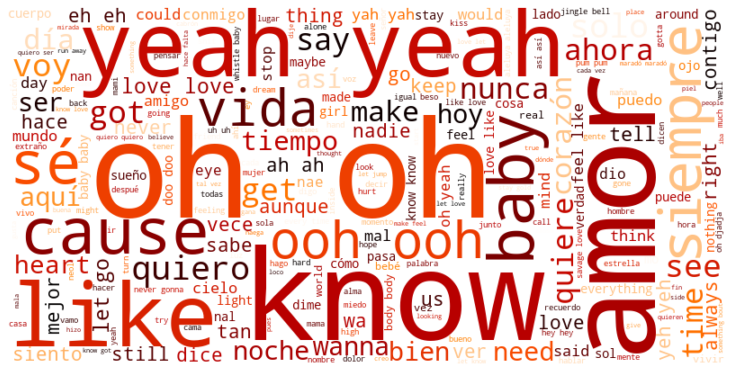

In [50]:
wordcloud = WordCloud(width=800, height=400,

                      max_font_size=150, max_words=250,

                      background_color='white', colormap='gist_heat',

                      stopwords=stopwords_en).generate(palabras) 
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

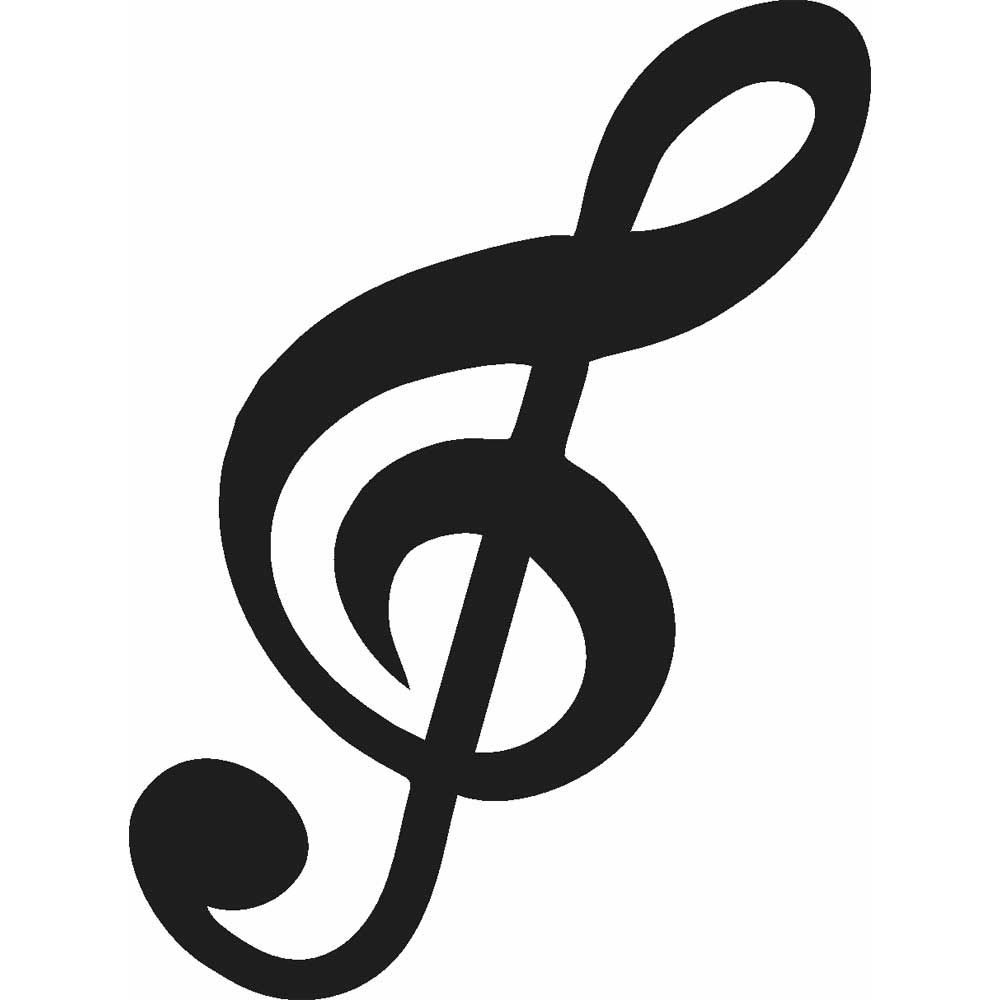

In [51]:
m = PIL.Image.open(ruta + "musica.jpg")
display(m)

In [52]:
mask = np.array(m)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

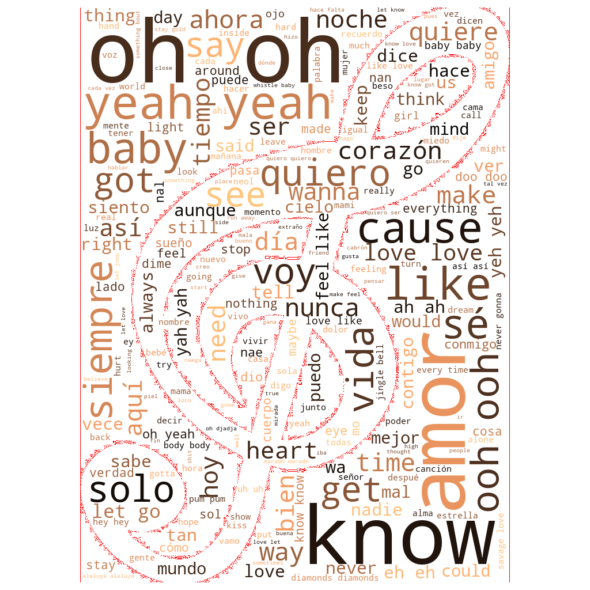

In [53]:
palabras = data.pre_procesado.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,

                      max_font_size=150, max_words=250,

                      background_color='white', colormap='copper_r',

                      stopwords=stopwords_en,

                      mask=mask, contour_width=0.5, contour_color='red').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
wordcloud.to_file("musica.png")
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Conclusiones

#### Hacer Web Scraping es una muy buena idea para obtener información, sin embargo, puede demandar bastante mantenimiento, ya que durante el desarrollo nos efrentamos a cambios inesperados en la página, como también cambios en la información publicada, un ejemplo de ello se evidenció en una canción de Adele, en la cual la letra dejo de aparecer aunque llegaba en el ranking, en su lugar aparecia un mensaje que indicaba que estaban tramitando los permisos con el artista para publicar la letra. 

#### Realizar el procesamiento y limpieza de la información cuando esta viene en varios idiomas resulta ser un tema complejo, de hecho, en los primeros pasos del desarrollo del proyecto, se deseaba estanadarizar las letras de las canciones utilizando from translate import Translator, sin embargo al realizar una tarea masiva como lo requeria en el proceso, nos enfrentamos a restricciones:

QUERY LENGTH LIMIT EXCEDEED. MAX ALLOWED QUERY : 500 CHARS MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE TRANSLATIONS FOR TODAY. NEXT AVAILABLE IN  18 HOURS 06 MINUTES 31 SECONDSVISIT HTTPS://MYMEMORY.TRANSLATED.NET/DOC/USAGELIMITS.PHP TO TRANSLATE MORE

#### Es posible que el modelo logístico multinomial no sea el más eficiente para obtener resultados con un mayor grado de precisión, sin embargo, los resultados también se pueden deber a la cantidad de datos obtenida, creemos que realizando una recolección y consolidación de datos durante un tiempo determinado, observariamos mejores resultados (hipotesis). 

#### El Procesamiento de Lenguaje Natural muestra que la ciencia de datos no es un campo estrictamente numérico, se pueden realizar diferentes tipos de estudios con textos de diferentes origenes y sobre diferentes temas.

#### El análisis de sentimiento es una de las herramientas más potentes del NLP, puesto que permite discernir rápidamente si la información recolectada sobre un tema o sobre una entidad es buena o mala, así puede conocer la percepción que un grupo de personas tienen sobre dicho tema en particular y les permite adaptarse y mejorar continuamente.